In [1]:
import cirq
from mitiq import zne, benchmarks
from mitiq.benchmarks import random_circuits
import math
import numpy as np
from functools import partial
import re 
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from mitiq import cdr, Observable, PauliString

In [2]:
def execute(circuit: cirq.Circuit, noise_level: float = 0.001) -> float:
    """Returns Tr[ρ |0⟩⟨0|] where ρ is the state prepared by the circuit with depolarizing noise."""
    noisy_circuit = circuit.with_noise(cirq.depolarize(p=noise_level))
    return cirq.DensityMatrixSimulator().simulate(noisy_circuit).final_density_matrix[0, 0].real

In [3]:
rng = np.random.default_rng()
def random_compile(mycircuit, nqubits, qreg):
    def apply_cnot(mycircuit, operation = cirq.ops.gate_operation):
    
        myList =  [float(s) for s in re.findall(r'[-+]?\d*\.\d+|\d+', str(operation))] #r'\b\d+\b'
        phase = 0
        if len(myList) == 2:
            b0, b1 = int(myList[0]), int(myList[1])
        elif len(myList) == 3:
            phase, b0, b1 = myList[0], int(myList[1]), int(myList[2])
        #print(phase, b0, b1)
        
        type = rng.integers(16)
        
        teta = 0.75#math.pi/2
        #for i in range(nqubits):
        for i in range(2):
            mycircuit.append(cirq.rx(teta).on(qreg[i]))
  
        if type == 0:
            mycircuit.append(operation)
        elif type == 1:
            mycircuit.append(cirq.X(qreg[b1]))
            mycircuit.append(operation)
            mycircuit.append(cirq.X(qreg[b1]))
        elif type == 2:
            mycircuit.append(cirq.Y(qreg[b1]))
            mycircuit.append(operation)
            mycircuit.append(cirq.Z(qreg[b0]))     
            mycircuit.append(cirq.Y(qreg[b1]))
        elif type == 3:
            mycircuit.append(cirq.Z(qreg[b1]))
            mycircuit.append(operation)
            mycircuit.append(cirq.Z(qreg[b0]))     
            mycircuit.append(cirq.Z(qreg[b1]))            
        elif type == 4:
            mycircuit.append(cirq.Y(qreg[b0]))
            mycircuit.append(operation)
            mycircuit.append(cirq.Y(qreg[b0]))     
            mycircuit.append(cirq.X(qreg[b1]))            
        elif type == 5:
            mycircuit.append(cirq.Y(qreg[b0]))
            mycircuit.append(cirq.X(qreg[b1]))
            mycircuit.append(operation)   
            mycircuit.append(cirq.Y(qreg[b0]))            
        elif type == 6:
            mycircuit.append(cirq.Y(qreg[b0]))
            mycircuit.append(cirq.Y(qreg[b1]))
            mycircuit.append(operation) 
            mycircuit.append(cirq.X(qreg[b0])) 
            mycircuit.append(cirq.Z(qreg[b1]))       
        elif type == 7:
            mycircuit.append(cirq.Y(qreg[b0]))
            mycircuit.append(cirq.Z(qreg[b1]))
            mycircuit.append(operation)  
            mycircuit.append(cirq.X(qreg[b0])) 
            mycircuit.append(cirq.Y(qreg[b1]))               
        elif type == 8:
            mycircuit.append(cirq.X(qreg[b0]))
            mycircuit.append(operation)  
            mycircuit.append(cirq.X(qreg[b0])) 
            mycircuit.append(cirq.X(qreg[b1]))               
        elif type == 9:
            mycircuit.append(cirq.X(qreg[b0]))
            mycircuit.append(cirq.X(qreg[b1]))
            mycircuit.append(operation)   
            mycircuit.append(cirq.X(qreg[b0]))              
        elif type == 10:
            mycircuit.append(cirq.X(qreg[b0]))
            mycircuit.append(cirq.Y(qreg[b1]))
            mycircuit.append(operation)
            mycircuit.append(cirq.Y(qreg[b0])) 
            mycircuit.append(cirq.Z(qreg[b1]))             
        elif type == 11:
            mycircuit.append(cirq.X(qreg[b0]))
            mycircuit.append(cirq.Z(qreg[b1]))
            mycircuit.append(operation)
            mycircuit.append(cirq.Y(qreg[b0])) 
            mycircuit.append(cirq.Y(qreg[b1]))             
        elif type == 12:
            mycircuit.append(cirq.Z(qreg[b0]))
            mycircuit.append(operation) 
            mycircuit.append(cirq.Z(qreg[b0]))           
        elif type == 13:
            mycircuit.append(cirq.Z(qreg[b0]))
            mycircuit.append(cirq.X(qreg[b1]))
            mycircuit.append(operation)   
            mycircuit.append(cirq.Z(qreg[b0])) 
            mycircuit.append(cirq.X(qreg[b1]))             
        elif type == 14:
            mycircuit.append(cirq.Z(qreg[b0]))
            mycircuit.append(cirq.Y(qreg[b1]))
            mycircuit.append(operation)
            mycircuit.append(cirq.Y(qreg[b1]))             
        elif type == 15:
            mycircuit.append(cirq.Z(qreg[b0]))
            mycircuit.append(cirq.Z(qreg[b1]))
            mycircuit.append(operation)
            mycircuit.append(cirq.Z(qreg[b1]))             
        return mycircuit
    
        #for i in range(nqubits):
        for i in range(2):
            mycircuit.append(cirq.rx(-teta).on(qreg[i]))      
    
    mycircuit2 = cirq.Circuit() 
    
    for moment in mycircuit:
        myTuple = moment.operations
        for i in myTuple:
            matchers = ['CXPowGate', 'CZ', 'CY', 'CX', 'CNOT']
            matching = bool([s for s in matchers if(s in str(i))])
            if matching == True:
                #print("CNOT", print("i", type(i), i.gate)
                mycircuit2 = apply_cnot(mycircuit2, i)
                
            #else:
                #mycircuit2.append(i)
            
    #return cirq.ConvertToCzAndSingleGates().optimize_circuit(mycircuit2)        
    return mycircuit2 
    #return simplify(mycircuit2)

In [4]:
#Observable
from typing import Tuple
from mitiq import Executor, Observable, PauliString, MeasurementResult
from mitiq.interface import mitiq_cirq
from cirq import X, I

t = 4
paulis = []
paulis.append(PauliString("I", coeff=0.5*(2**t-1)))
for p in range(t):    
    paulis.append(PauliString("Z", coeff=0.5*-2**(t-1-p), support=(p,)))
obs = Observable(*paulis)
print("Obs:",obs)

#obs = Observable(PauliString("ZZ"), PauliString("X", coeff=-1.75))

Obs: (7.5+0j)*I + (-4+0j)*Z(0) + (-2+0j)*Z(1) + -Z(2) + (-0.5+0j)*Z(3)


In [5]:
import cirq
from mitiq import cdr, Observable, PauliString
from mitiq.benchmarks import random_circuits
import math
from mitiq.interface.mitiq_cirq import compute_density_matrix

def simulate(circuit: cirq.Circuit, noise_level: float = 0.001) -> float:
    """Returns Tr[ρ |0⟩⟨0|] where ρ is the state prepared by the circuit with depolarizing noise."""
    noisy_circuit = circuit.with_noise(cirq.depolarize(p=noise_level))
    return cirq.DensityMatrixSimulator().simulate(noisy_circuit).final_density_matrix[0, 0].real
#simulate(circuit).round(3)

#circuit: cirq.Circuit = benchmarks.generate_rb_circuits(n_qubits=1, num_cliffords=50)[0]

a, b = cirq.LineQubit.range(2)
circuit = cirq.Circuit()

rep = 3 #To make the circuit longer
for i in range(rep):
    circuit.append(cirq.rx(0.1).on(a))
    circuit.append(cirq.rx(-0.72).on(b))
    circuit.append(cirq.rz(0.4).on(a))
    circuit.append(cirq.rz(0.2).on(b))
    circuit.append(cirq.CNOT.on(a, b))
    circuit.append(cirq.rx(-0.1).on(b))
    circuit.append(cirq.rz(-0.23).on(a))
    circuit.append(cirq.CNOT.on(b, a))
    circuit.append(cirq.rx(-0.112).on(a))
    



true_value = simulate(circuit,noise_level=0.0)       # Ideal quantum computer.
noisy_value = simulate(circuit, noise_level=0.008)                    # Noisy quantum computer.
cdr_value = cdr.execute_with_cdr(circuit, simulate ,observable=obs,simulator=simulate).real  # Noisy quantum computer + Mitiq.

print(f"Error (w/o  Mitiq): %0.4f" %abs((true_value - noisy_value) / true_value))
print(f"Error (with Mitiq): %0.4f" %abs((true_value - cdr_value) / true_value))
print(circuit)


Error (w/o  Mitiq): 0.1405
Error (with Mitiq): 0.0196
0: ───Rx(0.032π)────Rz(0.127π)───@───Rz(-0.073π)───X───Rx(-0.036π)───Rx(0.032π)───Rz(0.127π)───@───Rz(-0.073π)───X───Rx(-0.036π)───Rx(0.032π)───Rz(0.127π)───@───Rz(-0.073π)───X───Rx(-0.036π)───
                                 │                 │                                           │                 │                                           │                 │
1: ───Rx(-0.229π)───Rz(0.064π)───X───Rx(-0.032π)───@───Rx(-0.229π)───Rz(0.064π)────────────────X───Rx(-0.032π)───@───Rx(-0.229π)───Rz(0.064π)────────────────X───Rx(-0.032π)───@─────────────────


In [6]:
def doSimulation (nTrials, my_noise_level, target_circuit, estimation_circuit):

    error1, error2, error3, error4 = 0, 0, 0, 0
    for i in range(nTrials):
       # circuit=circuit.copy()
        cirq.ConvertToCzAndSingleGates().optimize_circuit(target_circuit)

        true_value = execute(target_circuit, noise_level=0.0)       # Ideal quantum computer.
        noisy_value = execute(target_circuit, my_noise_level)       # Noisy quantum computer.
        cdr_value = cdr.execute_with_cdr(target_circuit, partial(execute, noise_level=my_noise_level),observable=obs,simulator=simulate,).real   # Noisy quantum computer + Mitiq.
        
        
        noisy_value_est = execute(estimation_circuit, my_noise_level)  # Noisy version with the estimation circuit.
        noisy_value_cor = noisy_value / noisy_value_est  # Corrected 
        
        #_1_p = obs.expectation(estimation_circuit, partial(execute, noise_level=my_noise_level)).real
        #print(_1_p, noisy_value_est) #same
          
        cdr_value_est = cdr.execute_with_cdr(estimation_circuit, partial(execute, noise_level=my_noise_level), observable=obs,simulator=simulate,).real # CDR version with the estimation circuit.
        cdr_value_cor = cdr_value / cdr_value_est # Corrected
        #print(cdr_value)
        #print(cdr_value_est)

        error1 = error1 + 1/nTrials* abs((true_value - noisy_value) / true_value) #w/o any of Mitiq CDR & RC
        error2 = error2 + 1/nTrials* abs((true_value - cdr_value) / true_value) #with Mitiq CDR, w/o RC
        error3 = error3 + 1/nTrials* abs((true_value - noisy_value_cor) / true_value) #w/o Mitiq CDR, with RC
        error4 = error4 + 1/nTrials* abs((true_value - cdr_value_cor) / true_value) #with both Mitiq CDR & RC  
       

    return error1, error2, error3, error4



In [7]:
myqubits = [a,b]
#nqubits = 2
nTrials = 5

my_noise_level_array = [0.01 *i for i in range(0,11,1)] 

target_circuit = circuit
estimation_circuit = random_compile(circuit, t, myqubits)
#print(target_circuit)
print(estimation_circuit)
error1_array, error2_array, error3_array, error4_array = [], [], [], []
for my_noise_level in tqdm(my_noise_level_array):
    error1, error2, error3, error4 = doSimulation (nTrials, my_noise_level, target_circuit, estimation_circuit)
    error1_array.append(error1)
    error2_array.append(error2)
    error3_array.append(error3)
    error4_array.append(error4)

print(f"Avg Error (w/o any of Mitiq CDR or RC): %0.4f" %error1)
print(f"Avg Error (with Mitiq CDR, w/o RC): %0.4f" %error2)
print(f"Avg Error (w/o Mitiq CDR, with RC): %0.4f" %error3)
print(f"Avg Error (with both Mitiq CDR & RC): %0.4f" %error4)


  0%|                                                                                           | 0/11 [00:00<?, ?it/s]

0: ───Rx(0.239π)───@───Rx(0.239π)───X───X───Rx(0.239π)───Y────────────@───Y───Rx(0.239π)───Y───X───Y───Rx(0.239π)───Y───@───X───Rx(0.239π)───────X───────
                   │                    │                             │                        │                        │                        │
1: ───Rx(0.239π)───X───Rx(0.239π)───Y───@───Y────────────Rx(0.239π)───X───X───Rx(0.239π)───────@───Z───Rx(0.239π)───Y───X───Z───Rx(0.239π)───Z───@───Z───


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [03:16<00:00, 17.83s/it]

Avg Error (w/o any of Mitiq CDR or RC): 0.6066
Avg Error (with Mitiq CDR, w/o RC): 0.0617
Avg Error (w/o Mitiq CDR, with RC): 0.5440
Avg Error (with both Mitiq CDR & RC): 0.1196


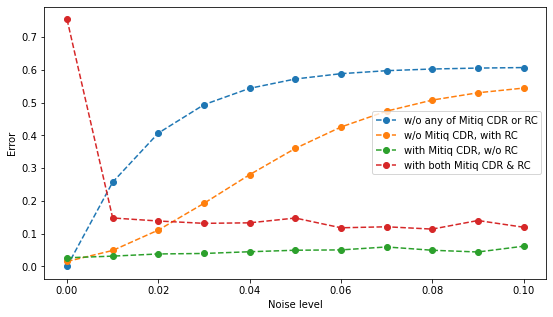

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))

plt.plot(my_noise_level_array, error1_array,"--o", label="w/o any of Mitiq CDR or RC")
plt.plot(my_noise_level_array, error3_array, "--o", label="w/o Mitiq CDR, with RC")
plt.plot(my_noise_level_array, error2_array, "--o", label="with Mitiq CDR, w/o RC")
plt.plot(my_noise_level_array, error4_array, "--o", label="with both Mitiq CDR & RC")

plt.xlabel("Noise level")
plt.ylabel("Error")

plt.legend()
plt.savefig('cdr_rc2.png', dpi=300, facecolor='white')
plt.show();